In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.linear_model import LinearRegression

/home/andre/.pyenv/versions/PokeMMO/envs/trab_lingprog/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
target_column = "temperature_2m_max (°C)"
dataset_path = './datas/archive_porto_alegre.csv'
shift_times = 3

### Tirando as duas primeiras linhas

In [3]:
with open(dataset_path, 'r') as ff:
    lines = ff.readlines()
    
if lines[0] != "\n":
    with open(dataset_path, 'r+') as ff:
        lines = ff.readlines()

        # move file pointer to the beginning of a file
        ff.seek(0)

        # truncate the file
        ff.truncate()

        # start writing lines except the first line
        # lines[1:] from line 2 to last line
        ff.writelines(lines[2:])
        print("entrou")

In [4]:
df = pd.read_csv(dataset_path)
df

,time,temperature_2m_max (°C),temperature_2m_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h)
0,2018-01-01,30.7,20.7,26.23,6.2,11.0
1,2018-01-02,25.8,21.2,11.50,11.5,17.7
2,2018-01-03,28.7,19.3,26.50,0.1,18.5
3,2018-01-04,32.1,18.6,32.47,0.0,12.1
4,2018-01-05,33.6,19.6,28.17,0.0,13.4
...,...,...,...,...,...,...
1821,2022-12-27,28.9,18.7,27.02,6.0,20.3
1822,2022-12-28,25.8,19.0,20.23,37.1,18.8
1823,2022-12-29,26.7,19.1,30.47,0.1,16.3
1824,2022-12-30,30.7,15.7,32.40,0.0,15.1


## Shiftando o dataset para incluir dados passados

In [5]:
columns = list(df.columns)
columns.remove("time")
print(columns)
for column in columns:
    first = column.split("_")[0]
    last = column.split("_")[-1]
    last = last.split(" ")[0]
    
    df[f"{first}_{last}_lastMounth"] = df[column].shift(1)
    for i in range(1, shift_times):
        df[f"{first}_{last}_{i+1}MounthsBack"] = df[column].shift(i + 1)

df = df.drop(df.index[0:shift_times])
df = df.reset_index()
df = df.drop("index", axis=1)
df

['temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)', 'windspeed_10m_max (km/h)']


,time,temperature_2m_max (°C),temperature_2m_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),temperature_max_lastMounth,temperature_max_2MounthsBack,temperature_max_3MounthsBack,temperature_min_lastMounth,...,temperature_min_3MounthsBack,shortwave_sum_lastMounth,shortwave_sum_2MounthsBack,shortwave_sum_3MounthsBack,rain_sum_lastMounth,rain_sum_2MounthsBack,rain_sum_3MounthsBack,windspeed_max_lastMounth,windspeed_max_2MounthsBack,windspeed_max_3MounthsBack
0,2018-01-04,32.1,18.6,32.47,0.0,12.1,28.7,25.8,30.7,19.3,...,20.7,26.50,11.50,26.23,0.1,11.5,6.2,18.5,17.7,11.0
1,2018-01-05,33.6,19.6,28.17,0.0,13.4,32.1,28.7,25.8,18.6,...,21.2,32.47,26.50,11.50,0.0,0.1,11.5,12.1,18.5,17.7
2,2018-01-06,26.8,21.4,20.57,0.4,26.0,33.6,32.1,28.7,19.6,...,19.3,28.17,32.47,26.50,0.0,0.0,0.1,13.4,12.1,18.5
3,2018-01-07,26.5,18.0,25.30,0.0,19.3,26.8,33.6,32.1,21.4,...,18.6,20.57,28.17,32.47,0.4,0.0,0.0,26.0,13.4,12.1
4,2018-01-08,28.0,19.2,27.71,0.0,24.5,26.5,26.8,33.6,18.0,...,19.6,25.30,20.57,28.17,0.0,0.4,0.0,19.3,26.0,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2022-12-27,28.9,18.7,27.02,6.0,20.3,25.4,31.6,34.2,21.7,...,19.4,12.20,24.54,32.16,0.1,0.9,0.0,17.7,23.2,17.8
1819,2022-12-28,25.8,19.0,20.23,37.1,18.8,28.9,25.4,31.6,18.7,...,20.8,27.02,12.20,24.54,6.0,0.1,0.9,20.3,17.7,23.2
1820,2022-12-29,26.7,19.1,30.47,0.1,16.3,25.8,28.9,25.4,19.0,...,21.7,20.23,27.02,12.20,37.1,6.0,0.1,18.8,20.3,17.7
1821,2022-12-30,30.7,15.7,32.40,0.0,15.1,26.7,25.8,28.9,19.1,...,18.7,30.47,20.23,27.02,0.1,37.1,6.0,16.3,18.8,20.3


## Separando treino e teste

In [6]:
df_test = df.iloc[-341:]
df_train = df.drop(df.index[-341:])
df_test.reset_index(inplace=True, drop=True)
df_test.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),temperature_max_lastMounth,temperature_max_2MounthsBack,temperature_max_3MounthsBack,temperature_min_lastMounth,...,temperature_min_3MounthsBack,shortwave_sum_lastMounth,shortwave_sum_2MounthsBack,shortwave_sum_3MounthsBack,rain_sum_lastMounth,rain_sum_2MounthsBack,rain_sum_3MounthsBack,windspeed_max_lastMounth,windspeed_max_2MounthsBack,windspeed_max_3MounthsBack
0,2022-01-25,36.8,24.9,27.81,0.3,16.0,35.8,38.2,38.7,25.7,...,25.3,28.08,23.10,27.99,0.0,1.3,0.2,17.1,14.8,13.0
1,2022-01-26,37.5,25.4,23.90,10.5,16.2,36.8,35.8,38.2,24.9,...,27.0,27.81,28.08,23.10,0.3,0.0,1.3,16.0,17.1,14.8
2,2022-01-27,26.9,21.7,6.52,13.4,24.0,37.5,36.8,35.8,25.4,...,25.7,23.90,27.81,28.08,10.5,0.3,0.0,16.2,16.0,17.1
3,2022-01-28,25.2,19.5,19.63,0.0,22.2,26.9,37.5,36.8,21.7,...,24.9,6.52,23.90,27.81,13.4,10.5,0.3,24.0,16.2,16.0
4,2022-01-29,25.8,18.1,21.43,0.0,20.7,25.2,26.9,37.5,19.5,...,25.4,19.63,6.52,23.90,0.0,13.4,10.5,22.2,24.0,16.2


In [7]:
df_train

,time,temperature_2m_max (°C),temperature_2m_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),temperature_max_lastMounth,temperature_max_2MounthsBack,temperature_max_3MounthsBack,temperature_min_lastMounth,...,temperature_min_3MounthsBack,shortwave_sum_lastMounth,shortwave_sum_2MounthsBack,shortwave_sum_3MounthsBack,rain_sum_lastMounth,rain_sum_2MounthsBack,rain_sum_3MounthsBack,windspeed_max_lastMounth,windspeed_max_2MounthsBack,windspeed_max_3MounthsBack
0,2018-01-04,32.1,18.6,32.47,0.0,12.1,28.7,25.8,30.7,19.3,...,20.7,26.50,11.50,26.23,0.1,11.5,6.2,18.5,17.7,11.0
1,2018-01-05,33.6,19.6,28.17,0.0,13.4,32.1,28.7,25.8,18.6,...,21.2,32.47,26.50,11.50,0.0,0.1,11.5,12.1,18.5,17.7
2,2018-01-06,26.8,21.4,20.57,0.4,26.0,33.6,32.1,28.7,19.6,...,19.3,28.17,32.47,26.50,0.0,0.0,0.1,13.4,12.1,18.5
3,2018-01-07,26.5,18.0,25.30,0.0,19.3,26.8,33.6,32.1,21.4,...,18.6,20.57,28.17,32.47,0.4,0.0,0.0,26.0,13.4,12.1
4,2018-01-08,28.0,19.2,27.71,0.0,24.5,26.5,26.8,33.6,18.0,...,19.6,25.30,20.57,28.17,0.0,0.4,0.0,19.3,26.0,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2022-01-20,36.6,24.5,28.67,1.4,17.2,36.4,32.1,37.7,24.2,...,25.2,30.15,22.15,25.67,0.0,0.9,6.6,16.2,15.2,15.4
1478,2022-01-21,35.5,24.5,29.44,0.1,17.7,36.6,36.4,32.1,24.5,...,24.6,28.67,30.15,22.15,1.4,0.0,0.9,17.2,16.2,15.2
1479,2022-01-22,38.7,25.3,27.99,0.2,13.0,35.5,36.6,36.4,24.5,...,24.2,29.44,28.67,30.15,0.1,1.4,0.0,17.7,17.2,16.2
1480,2022-01-23,38.2,27.0,23.10,1.3,14.8,38.7,35.5,36.6,25.3,...,24.5,27.99,29.44,28.67,0.2,0.1,1.4,13.0,17.7,17.2


## Separando X e Y

In [68]:
time = df_train["time"]
time = pd.DataFrame(time)
Y_train = df_train[target_column]
X_train = df_train.drop(["time", target_column], axis=1)


time_test = df_test["time"]
time_test = pd.DataFrame(time_test)
Y_test = df_test[target_column]
X_test = df_test.drop(["time", target_column], axis=1)

Y_train

0       32.1
1       33.6
2       26.8
3       26.5
4       28.0
        ... 
1477    36.6
1478    35.5
1479    38.7
1480    38.2
1481    35.8
Name: temperature_2m_max (°C), Length: 1482, dtype: float64

## Treinando

In [25]:
rgs = LinearRegression()

rgs = rgs.fit(X_train, Y_train)

## Validando

In [34]:
y_pred = rgs.predict(X_test)

In [31]:
y_pred = list(y_pred)
if target_column == "rain_sum (mm)":
    y_pred = [0.0 if yi < 0 else yi for yi in y_pred]

## Pegando a previsão desejada

In [70]:
time_test["predictions"] = pd.Series(list(y_pred))
time_test["real_value"] = Y_test
prediction_desired = float(time_test.loc[time_test["time"] == "2022-12-30", "predictions"])
real_value = float(time_test.loc[time_test["time"] == "2022-12-30", "real_value"])
prediction_desired

27.876417857359137

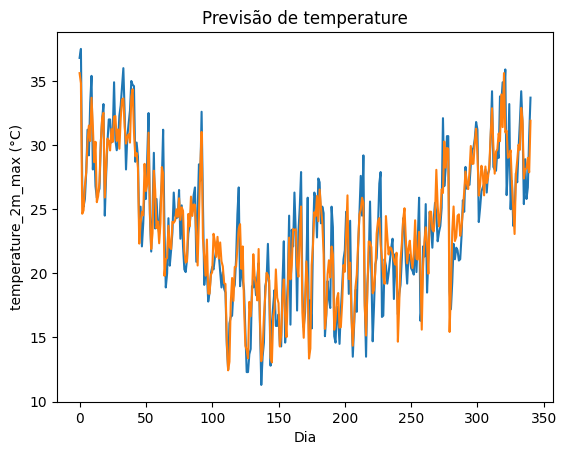

In [11]:
import matplotlib.pyplot as plt

plt.xlabel('Dia')
plt.ylabel(target_column)
plt.title(f'Previsão de {target_column.split("_")[0]}')
plt.plot(list(X_test.index), list(Y_test))
plt.plot(list(X_test.index), y_pred)

In [12]:
def mse(y_predicted, y_real):
    return sum((y_predicted - y_real))/len(y_real)
mse(y_pred, Y_test)

0.0839577416903943